- spec (Python 3.11.4)

In [1]:
# load libraries for data processing

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import chemometrics as cm
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
from chemometrics.mcr import McrAR
import chemometrics.mcr.constraint as constraint
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.extmath import randomized_svd
from scipy.signal import savgol_filter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Get CSV files list from a folder
path = 'f:/GAC_KSY/spectrum/1_amaranth/data/NIR_Gachon_amaranth'
mat_files = glob.glob(path + "/*.xlsx")
df_list = [pd.read_excel(file) for file in mat_files]
df = pd.concat(df_list, ignore_index=False, axis = 1, join = "outer")
# import data into dict
data = {}
for file in mat_files:
    data[file.split("/")[-1].replace(".xlsx","").replace('NIR_Gachon_amaranth\\Gachon_','')] = pd.read_excel(file, index_col=0)


info = {'Experiment': df.columns[1:]}
infodf = pd.DataFrame(info)

infodf['Group'] = infodf.Experiment.str.split("_").str[0]
labels = infodf['Group']
le = LabelEncoder().fit_transform(labels)
colors = [plt.cm.jet(float(i)/max(le)) for i in le]
infodf["Colors"] = colors 

wl = pd.Series(df["Cm-1"].to_numpy().ravel(order="K"), name="ref")

In [3]:
import re
rm_word = ['Cm-1', '땅심이', 'NR','CG','S','Water', 'Etoh']

'''for grp in infodf["Group"]:
    if grp in rm_word:
        rm_list.append(grp)
'''
rm_list = []
for grp in infodf["Group"]:
    for word in rm_word:
        if re.search(word, grp):
            # print(grp)
            rm_list.append(grp)
mod_info = infodf[~infodf['Group'].isin(rm_list)]

infodf[~infodf['Group'].isin(rm_list)]["Group"].values

# for check
# mod_info[mod_info['Experiment'].isin([r'O[1-5]_230519'])]
# [len(re.findall('O[1-5]_230519', exp)) > 0 for exp in mod_info['Experiment']]
# for exp in mod_info['Experiment']:
#     if re.search('땅심이 O[1-5]_230519', exp) != None :
#          print(exp) 
# len(re.findall('O[1-5]_230519', '땅심이 O2_230519_212526.0000')) > 0

array(['E46', 'E46', 'E46', 'E47', 'E47', 'E47', 'O46', 'O46', 'O46',
       'O47', 'O47', 'O47', 'E22', 'E22', 'E22', 'E24', 'E24', 'E24',
       'E26', 'E26', 'E26', 'E38', 'E38', 'E38', 'E444', 'E444', 'E444',
       'E62', 'E62', 'E62', 'E855', 'E855', 'E855', 'E875', 'E875',
       'E875', 'E946', 'E946', 'E946', 'O22', 'O22', 'O22', 'O24', 'O24',
       'O24', 'O26', 'O26', 'O26', 'O38', 'O38', 'O38', 'O444', 'O444',
       'O444', 'O62', 'O62', 'O62', 'O855', 'O855', 'O855', 'O875',
       'O875', 'O875', 'O946', 'O946', 'O946', 'O441', 'O441', 'O441',
       'O483', 'O483', 'O483', 'O496', 'O496', 'O496', 'O497', 'O497',
       'O497', 'O498', 'O498', 'O498', 'Black Bird E2', 'Black Bird E2',
       'Black Bird E2', 'Black Bird E3', 'Black Bird E3', 'Black Bird E3',
       'Black Bird E4', 'Black Bird E4', 'Black Bird E4', 'Black Bird E5',
       'Black Bird E5', 'Black Bird E5', 'Black Bird O2', 'Black Bird O2',
       'Black Bird O2', 'Black Bird O3', 'Black Bird O3', 'Black 

https://github.com/Gscorreia89/chemometrics-tutorials/tree/master

In [4]:
# Import the required python packages including 
# the custom Chemometric Model objects
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import pandas as pds
import matplotlib.pyplot as plt

from pyChemometrics.ChemometricsPCA import ChemometricsPCA
from pyChemometrics.ChemometricsScaler import ChemometricsScaler
from plotting_utils import plotLoadings

# Use to obtain same values as in the text
np.random.seed(350)

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [6]:
import pickle
with open('../pickle/sdf.pickle','rb') as fr:
    sdf = pickle.load(fr)

with open('../pickle/kNNimpute.pickle','rb') as fr:
    ki = pickle.load(fr)

In [7]:
ki['mod_info']['Extract'] = "raw"
# 30% EtOH
ki['mod_info'].loc[ki['mod_info']['Group'].str.contains('E'), 'Extract'] = "EtOH"

print(ki['mod_info']['Group'].str.contains('E|O').sum(), len(ki['mod_info']))
ki.keys()

782 782


dict_keys(['sdf', 'mod_info', 'train', 'test', 'Xi'])

In [13]:
mod_info

,Experiment,Group,Colors
0,E46_res32_001_230428_104059.0000,E46,"(0.148640101201771, 1.0, 0.8191018342820999, 1.0)"
1,E46_res32_001_230428_104059.0001,E46,"(0.148640101201771, 1.0, 0.8191018342820999, 1.0)"
2,E46_res32_001_230428_104059.0002,E46,"(0.148640101201771, 1.0, 0.8191018342820999, 1.0)"
3,E47_res32_001_230428_105353.0000,E47,"(0.16129032258064513, 1.0, 0.8064516129032259,..."
4,E47_res32_001_230428_105353.0001,E47,"(0.16129032258064513, 1.0, 0.8064516129032259,..."
...,...,...,...
1041,O281_20230809_132552.0001,O281,"(0.9099821746880573, 0.0007262164124910431, 0...."
1042,O281_20230809_132552.0002,O281,"(0.9099821746880573, 0.0007262164124910431, 0...."
1043,O289_20230809_133825.0000,O289,"(0.9099821746880573, 0.0007262164124910431, 0...."
1044,O289_20230809_133825.0001,O289,"(0.9099821746880573, 0.0007262164124910431, 0...."


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0.343212 0.343972 0.344375 ... 0.318881 0.317077 0.317932]
 [0.342617 0.34355  0.343169 ... 0.31789  0.315331 0.316474]
 [0.340973 0.342672 0.341389 ... 0.316263 0.314166 0.315346]
 ...
 [0.702428 0.702011 0.702376 ... 0.65693  0.656785 0.656704]
 [0.69917  0.698705 0.698973 ... 0.653928 0.653841 0.653904]
 [0.694212 0.693696 0.693733 ... 0.649618 0.649396 0.649761]]
(489, 81)
[0.345719 0.345354 0.344612 0.343785 0.342552 0.341405 0.340719 0.340229
 0.339144 0.338613 0.337348 0.336674 0.33613  0.335701 0.332277 0.318831
 0.310162 0.321489 0.329436 0.33012  0.329004 0.328236 0.328122 0.327314
 0.326171 0.325369 0.324848 0.32392  0.322827 0.322148 0.32196  0.321639
 0.320753 0.319916 0.319015 0.31844  0.317715 0.317094 0.317091 0.317022
 0.316415 0.316101 0.315394 0.314684 0.313914 0.313698 0.313016 0.312199
 0.311496 0.311363 0.310958 0.3105   0.310008 0.309569 0.309473 0.309068
 0.308714 0.307366 0.306653 0.306238 0.305959 0.305458 0.30506  0.304604
 0.303987 0.303066 0.302241 0.3020

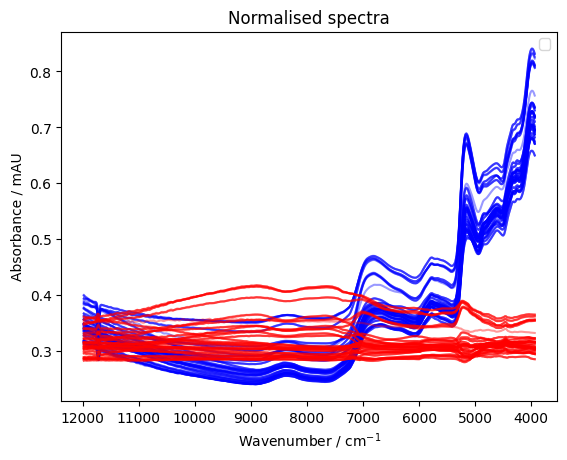

In [37]:
['230428', '230503', '230511', '230512', '230515', '230518', 
 '230519', '230521', '230522', '230528', '230605', '230606', 
 '230610', '230612', '2ndanalysis']

key = '2ndanalysis'
print(data[key].values)
print(data[key].values.shape)
print(np.median(data[key].values, axis=1))
print(np.median(data[key].values, axis=1).shape)

Y = data[key].values
median_spec = np.median(Y, axis = 0)
# Calculate the ratio to the reference per variable for all spectrum, to obtain a matrix of "fold changes"
fcmatrix = Y/ median_spec[None, :]
# Estimate the median fold change per row (spectrum), which is the PQN normalisation coefficient. 
# We use the nanmedian function to automatically ignore NA's when estimating this factor
pqn_coef = np.nanmedian(fcmatrix, axis=1)
# Normalise the spectra using the median ratio
norm_Y = Y / pqn_coef[:, None]
indx = data[key].index
fig, ax = plt.subplots()
ax.plot(indx, Y,  c='b', alpha=0.4)
ax.plot(indx, norm_Y, c='r', alpha=0.4)
ax.set_title("Normalised spectra")
plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
plt.ylabel('Absorbance / mAU')
ax.invert_xaxis()
ax.legend()
plt.show()

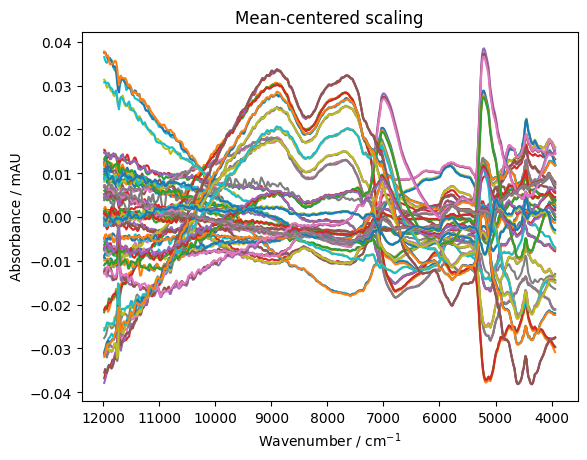

In [38]:
mc_scaler = ChemometricsScaler(scale_power=0)
mc_scaler.fit(norm_Y)
mc_Y = mc_scaler.transform(norm_Y)
#mc_X = preprocessing.scale(norm_X, axis=0, with_mean=True, with_std=False)
plt.figure()
plt.plot(indx, mc_Y)
plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
plt.ylabel('Absorbance / mAU')
plt.title("Mean-centered scaling")
plt.gca().invert_xaxis()
plt.show()

2) Unit-variance (UV) scaling: Mean-centring followed by division of each variable (column) by its own standard deviation
The spectroscopic peaks and signals of the spectrum are now barely recognisable (difficult interpretation), but now the latent variables detected will not be biased towards variation in the high intensity variables, which biologically is a more reasonable criteria. Low intensity noise values are more likely to be picked up, including baseline artefacts, and the magnitude of most variables is now equalised, making it harder to recognise the spectral profile.

In the next example we use the fit_transform method, which learns the scaling parameters and returns a scaled data matrix in one go.

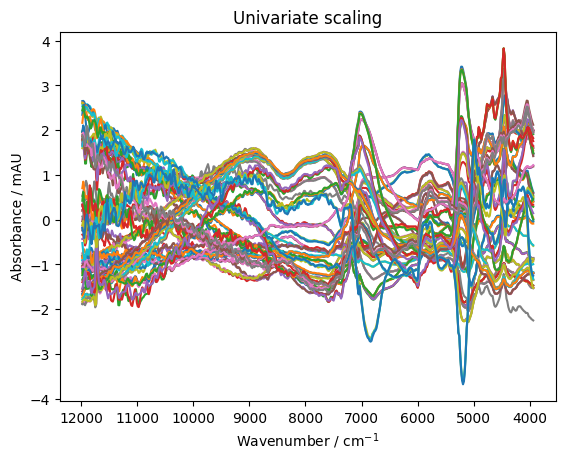

In [42]:
uv_scaler = ChemometricsScaler(scale_power=1)
uv_Y = uv_scaler.fit_transform(norm_Y)
# Univariate and mean-centred
#uv_X = preprocessing.scale(norm_X, axis=0, with_mean=True, with_std=True)
plt.figure()
plt.plot(indx, uv_Y)
plt.title("Univariate scaling")
plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
plt.ylabel('Absorbance / mAU')
plt.gca().invert_xaxis()
plt.show()

3) Pareto scaling: Mean-centring followed by division of each variable (column) by the square root of its own standard deviation
Pareto scaling provides a balance between the mean centering (no scaling) and UV scaling.

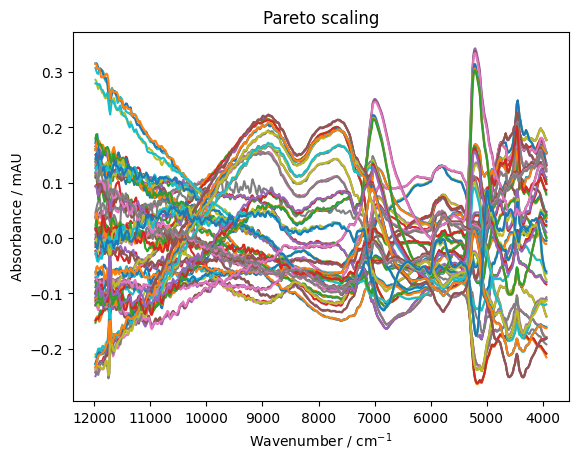

In [44]:
par_scaler = ChemometricsScaler(scale_power=1/2)
pa_Y = par_scaler.fit_transform(norm_Y)
#std_dev_sq_root = np.sqrt(mc_X.std(axis=0))
#pa_X = mc_X / std_dev_sq_root

plt.figure()
plt.plot(indx, pa_Y)
plt.title("Pareto scaling")
plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
plt.ylabel('Absorbance / mAU')
plt.gca().invert_xaxis()
plt.show()

4) Logarithmic and square root transformation
로그 및 제곱근 변환 또 다른 옵션은 로그 변환 및 제곱근 변환과 같은 데이터 매트릭스에 비선형 변환을 적용하는 것입니다. 로그 변환은 비선형 변환으로, 방법의 변동 계수가 일정할 때(평균이 증가함에 따라 분산이 증가함) 변수 간 및 변수 내에서 이분산성의 영향을 제거하는 장점이 있습니다. 변수에 대한 스케일링 효과는 파레토 스케일링과 다소 유사합니다. 단변량 분석에도 권장됩니다. 이러한 변환 함수는 0 값에 대해 정의되지 않습니다. 로그 변환을 수행하려면 먼저 모든 데이터 포인트가 음수가 아니고 0이 아닌지 확인하기 위해 오프셋을 추가합니다. 여기서는 데이터 세트의 최소값에 1을 더하여 계산됩니다. 모든 오프셋이나 기타 변환은 주의 깊게 기록되어야 합니다. 로그 및 제곱근 변환은 pyChemometrics.ChemometricsScaler 객체에서 구현되지 않지만 아래와 같이 데이터를 변환하여 적용할 수 있습니다. 이러한 변환을 적용한 후에도 데이터는 PCA 및 PLS 모델링 전에 여전히 평균 중심에 있어야 합니다.

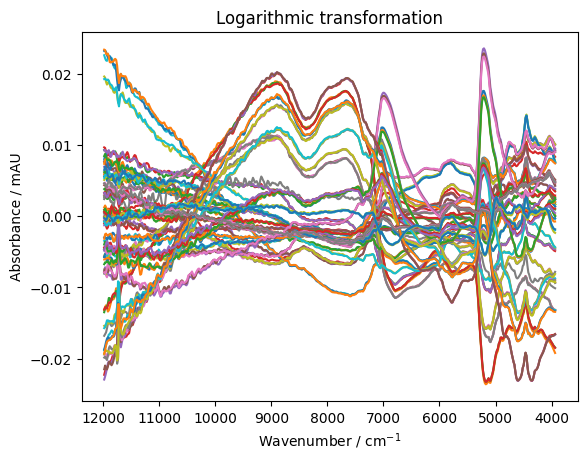

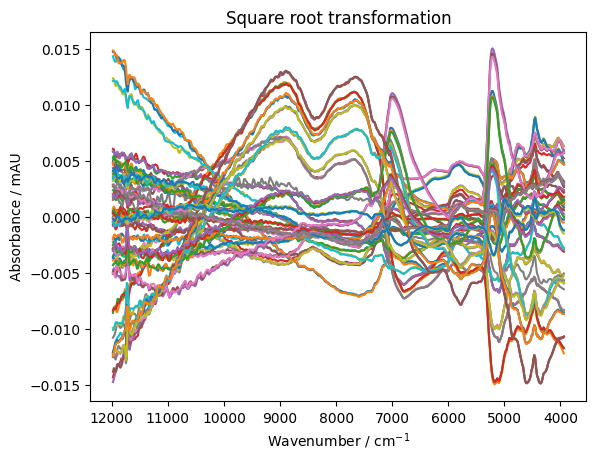

In [46]:
# Log scaling

# Offset is required to ensure all datapoints are non-negative and non-zero.
# Here it is being calculated by simply adding 1 
#to the minimum value in the dataset (to account for negative values in the noise region as well as 0).

offset = np.min(norm_Y) + 1
log_Y = np.log(norm_Y + offset)
mean_logvec = np.mean(log_Y, axis=0)
mclogY = (log_Y - mean_logvec)

plt.figure()
plt.plot(indx, mclogY)
plt.title("Logarithmic transformation")
plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
plt.ylabel('Absorbance / mAU')
plt.gca().invert_xaxis()
plt.show()

# Square root transformation

# Offset is required to ensure all datapoints are non-negative and non-zero.
# Here it is being calculated by simply adding 1 
#to the minimum value in the dataset (to account for negative values in the noise region as well as 0).

offset = np.min(norm_Y) + 1
sqrt_Y = np.sqrt(norm_Y + offset)
mean_sqrvec = np.mean(sqrt_Y, axis=0)
mcsqrt_Y = (sqrt_Y - mean_sqrvec)

plt.figure()
plt.plot(indx, mcsqrt_Y)
plt.title("Square root transformation")
plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
plt.ylabel('Absorbance / mAU')
plt.gca().invert_xaxis()
plt.show()

In [28]:
lines = []
error_lines = []
for key in data.keys():
    Y = data[key].values
    median_spec = np.median(Y, axis = 1)
    # Calculate the ratio to the reference per variable for all spectrum, to obtain a matrix of "fold changes"
    fcmatrix = Y/ median_spec[None, :]
    # Estimate the median fold change per row (spectrum), which is the PQN normalisation coefficient. 
    # We use the nanmedian function to automatically ignore NA's when estimating this factor
    pqn_coef = np.median(foldChangeMatrix, axis=0)
    # Normalise the spectra using the median ratio
    norm_Y = Y / pqn_coef[:, None]
    indx = data[key].index
    fig, ax = plt.subplots()
    ax.plot(indx, Y,  c='b', alpha=0.4)
    ax.plot(indx, norm_Y, c='r', alpha=0.4)
    ax.set_title("Normalised spectra")
    ax.set_xlabel("$\delta_H$ in ppm")
    ax.set_ylabel("Intensity (a.u.)")
    ax.invert_xaxis()
    ax.legend()
    plt.show()
    
    idf = mod_info[mod_info['Experiment'].isin(data[key].columns)]
    Y = savgol_filter(Y, int(6), polyorder =2, deriv =1)
    labels = idf['Group']
    le = LabelEncoder().fit_transform(labels)
    unique = list(set(le))
    

    if len(idf) > 0 : 

        for i in range(len(idf["Experiment"])):
            
            try: 
                cols = idf[idf['Experiment']==data[key].iloc[:,i].name]["Colors"].values[0]
                #print(key,i, len(idf))
                line_i = plt.plot(indx, Y[:,i], c=cols, alpha=0.5)
                lines.append(line_i[0])
            except IndexError:
                error_lines.append("Index:: %s_%s"%(key,data[key].iloc[:,i].name))
                print("IndexError",key,data[key].iloc[:,i].name)
            except ValueError:
                error_lines.append("Value:: %s_%s"%(key,data[key].iloc[:,i].name))
                print("Value Error",key,data[key].iloc[:,i].name,len(idf))
    else :
        continue
        print(np.array(error_lines))

ValueError: operands could not be broadcast together with shapes (460,12) (1,460) 

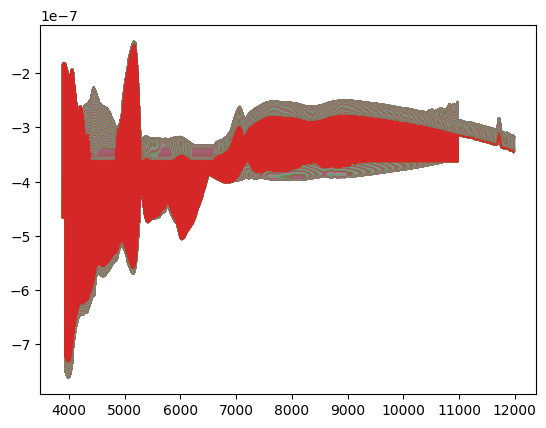

In [27]:
wl = ki['train'].columns
Y = cm.Whittaker(constraint_order = 3, deriv=2).fit_transform(ki['Xi'])

plt.plot(wl, Y)


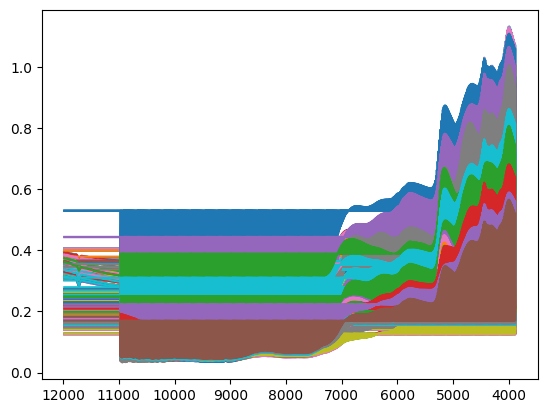

In [64]:
### Plot the raw data
plt.figure()
wl = ki['train'].columns
plt.plot(wl, ki['Xi'])
# plt.title("Raw data")
# plt.xlabel("$\delta_H$ in ppm")
# plt.ylabel("Intensity (a.u.)")
plt.gca().invert_xaxis()
# plt.show()

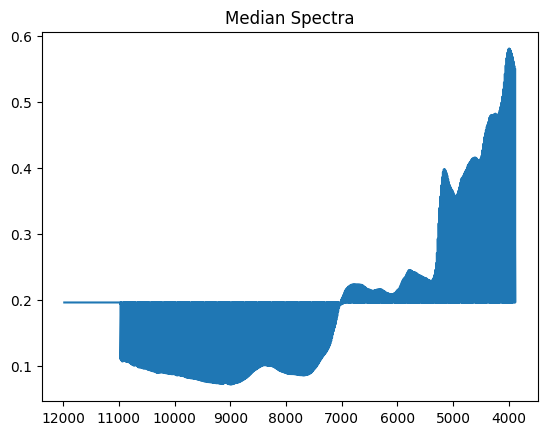

In [63]:
# Normalisation
# Get reference median spectra
median_spectra = np.median(ki['Xi'].T, axis=0)
median_spectra.shape

plt.figure()
plt.title("Median Spectra")
# plt.xlabel("$\delta_H$ in ppm")
# plt.ylabel("Intensity (a.u.)")
plt.plot(wl, median_spectra)
plt.gca().invert_xaxis()
plt.show()

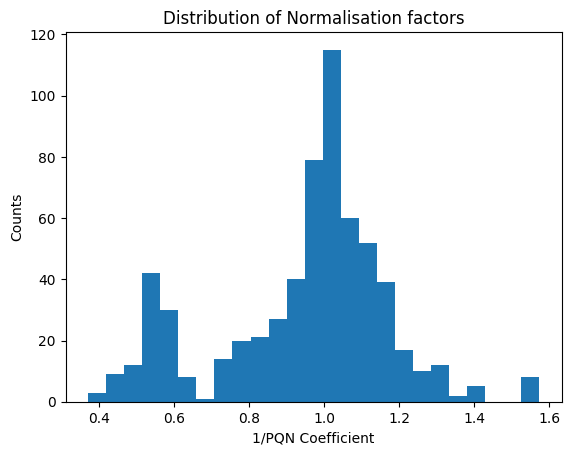

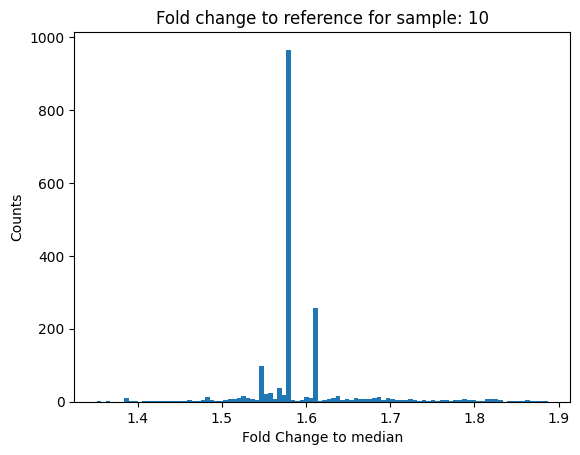

In [66]:
### PQN coefficients
# Calculate the ratio to the reference per variable for all spectrum, to obtain a matrix of "fold changes"
foldChangeMatrix = ki['Xi'].T / median_spectra[None, :]

# Estimate the median fold change per row (spectrum), which is the PQN normalisation coefficient. 
# We use the nanmedian function to automatically ignore NA's when estimating this factor
pqn_coef = np.nanmedian(foldChangeMatrix, axis=1)

# Normalise the spectra using the median ratio
norm_X = ki['Xi'].T  / pqn_coef[:, None]

plt.figure()
plt.hist(1/pqn_coef, bins=25)
plt.xlabel("1/PQN Coefficient")
plt.ylabel('Counts')
plt.title("Distribution of Normalisation factors")
plt.show()

#Truncate extreme values to narrow histogram range
sample_to_plot = 10
idx_to_plot = ((foldChangeMatrix[sample_to_plot, :] <= 5) & (foldChangeMatrix[sample_to_plot, :] >= -5 ))


plt.figure()
plt.title('Fold change to reference for sample: {0}'.format(sample_to_plot))
plt.xlabel("Fold Change to median")
plt.ylabel("Counts")
plt.hist(foldChangeMatrix[sample_to_plot, idx_to_plot], bins=100)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


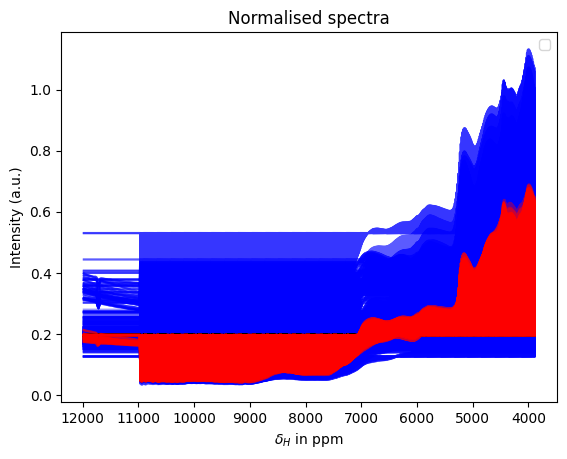

In [68]:
fig, ax = plt.subplots()
ax.plot(wl, ki['Xi'],  c='b', alpha=0.4)
ax.plot(wl, norm_X.T, c='r', alpha=0.4)
ax.set_title("Normalised spectra")
ax.set_xlabel("$\delta_H$ in ppm")
ax.set_ylabel("Intensity (a.u.)")
ax.invert_xaxis()
ax.legend()
plt.show()

#np.savetxt('./data/X_norm.csv', norm_X, delimiter=',')

In [12]:
import scipy.io as sio
def get_xY(filename, maxx=600):
    
    #sio.whosmat(filename)

    matcontents = sio.loadmat(filename)
    keys = list(matcontents.keys())
    
    for key in keys:
        if key[0] == '_':
            keys.remove(key)
    keys.remove("__version__")
    keys.sort()
    print(keys)  
    d = {}            
    for key in keys:
        data = matcontents[key][0][0]
        
        if key[-1] == "Y":
            Ydata = data[5]
            d[key] = Ydata
        else:
            xdata = data[5][:,:maxx]
            d[key] = xdata
            d["axisscale"]= data[7][1][0][0][:maxx].astype(np.float32)
                    
    return d

filename = '../data/example/nir_shootout_2002.mat'
dataset = get_xY(filename)

['calibrate_1', 'calibrate_2', 'calibrate_Y', 'test_1', 'test_2', 'test_Y', 'validate_1', 'validate_2', 'validate_Y']


1.0000000000000002
-4.6133789220365925e-17
4.016602295406501


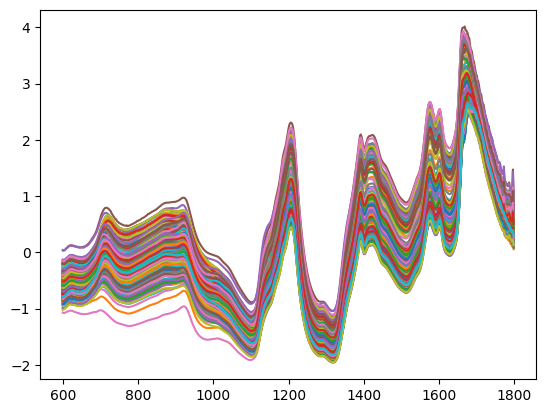

In [15]:
#Rescale to NN friendly number range
import matplotlib.pyplot as plt
%matplotlib inline

from ChemUtils import GlobalStandardScaler

xscaler = GlobalStandardScaler()

X_train = xscaler.fit_transform(dataset['test_1'])
X_test = xscaler.transform(dataset['calibrate_2'])

print(X_train.std()) 
print(X_train.mean()) 
print(X_train.max())
_ = plt.plot(dataset['axisscale'],X_train.T)

In [16]:
dataset['test_1']

array([[3.208891, 3.204533, 3.205919, ..., 3.854558, 3.931971, 3.802348],
       [3.297733, 3.297641, 3.297455, ..., 3.999709, 4.128924, 3.955051],
       [3.309056, 3.306748, 3.311501, ..., 3.999766, 4.109555, 3.948547],
       ...,
       [3.140838, 3.142496, 3.150017, ..., 3.929392, 3.951551, 3.888179],
       [2.983037, 2.986391, 2.991907, ..., 3.81321 , 3.830805, 3.770267],
       [3.143146, 3.142351, 3.149578, ..., 3.926037, 3.939383, 3.873668]],
      dtype='>f8')